# Import necessary libraries

In [1]:
#imports necessary libraries to do basic things on the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load and preprocess the data
data = pd.read_excel('https://query.data.world/s/46ldgtnufk4lbd7htkgruheneegxhq?dws=00000')

# We Read Dataset

In [2]:
#Reading data
# Load the dataset
data.head()

,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,AFG,1990,0.160560,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


WE DROP UNNWANTED DATA COLUMN

In [4]:
from sklearn.impute import SimpleImputer

data = data.drop(columns=['Code', 'Entity', 'Eating disorders (%)', 'Schizophrenia (%)' ])
data.head()

KeyError: "['Code', 'Entity', 'Eating disorders (%)', 'Schizophrenia (%)'] not found in axis"

# Preprocessing and Cleaning dataset

In [ ]:
#Check the dataset for missing data
if data.isnull().sum().sum() == 0 :
    print ('There is no missing data in our dataset')
else:
    print('There is {} missing data in our dataset '.format(data.isnull().sum().sum()))

In [ ]:
#Check our missing data from which columns and how many unique features they have.
frame = pd.concat([data.isnull().sum(), data.nunique(), data.dtypes], axis = 1, sort= False)
frame

In [ ]:
#Look at what is in the 'Bipolar disorder (%)' column to choose a suitable method to fill nan values.
data['Bipolar disorder (%)'].unique()

data = pd.DataFrame(data)

data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce') * 100

# Apply formatting only to numeric values with two decimal places
data['Bipolar disorder (%)'] = data['Bipolar disorder (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce') * 10

# Apply formatting only to numeric values with two decimal places
data['Depression (%)'] = data['Depression (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

# Print the DataFrame with the formatted column
print(data)


In [ ]:
data['Drug use disorders (%)'] = pd.to_numeric(data['Drug use disorders (%)'], errors='coerce') * 10

# Apply formatting only to numeric values with two decimal places
data['Drug use disorders (%)'] = data['Drug use disorders (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

# Print the DataFrame with the formatted column
print(data)

In [ ]:
data['Anxiety disorders (%)'] = pd.to_numeric(data['Anxiety disorders (%)'], errors='coerce') * 10

# Apply formatting only to numeric values with two decimal places
data['Anxiety disorders (%)'] = data['Anxiety disorders (%)'].apply(lambda x: f"{x:.2f}" if not pd.isna(x) else 'Not available')

# Print the DataFrame with the formatted column
print(data)

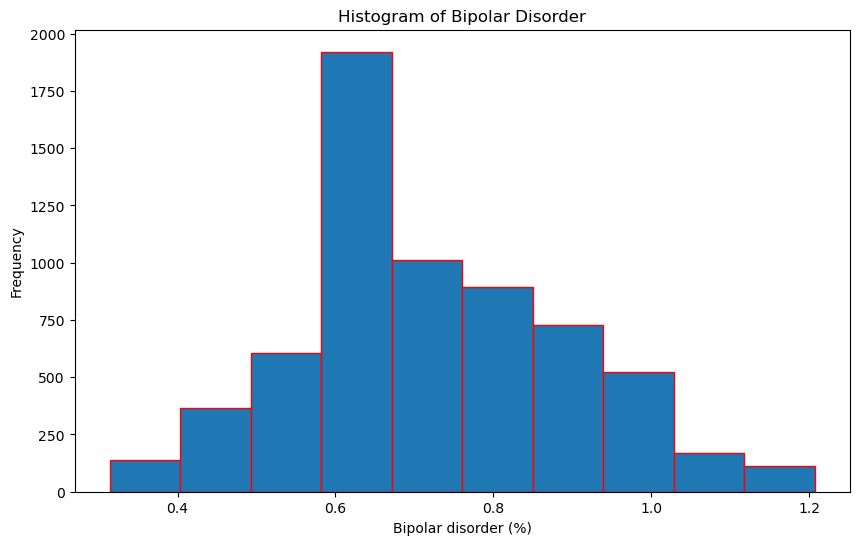

In [5]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Bipolar disorder (%)'], bins=10, edgecolor='red')

# Add labels and title
plt.xlabel('Bipolar disorder (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Bipolar Disorder')

# Show the plot
plt.show()


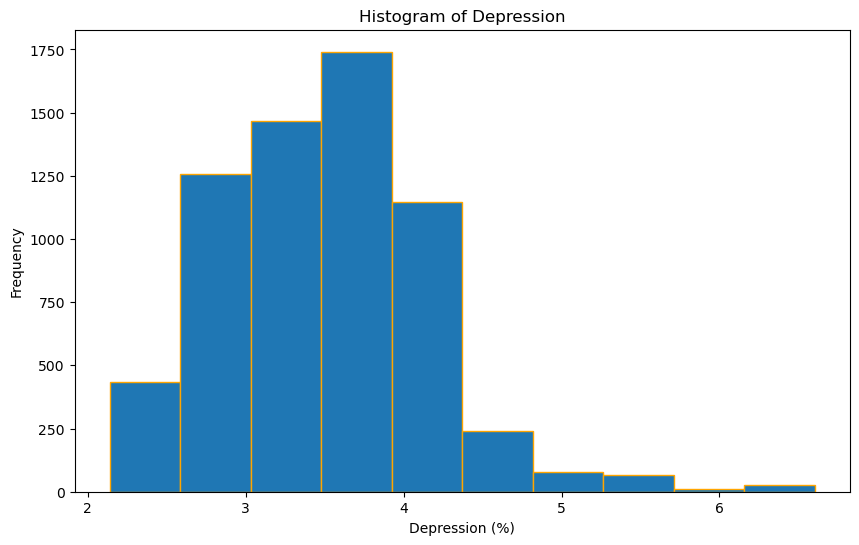

In [6]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Depression (%)'], bins=10, edgecolor='orange')

# Add labels and title
plt.xlabel('Depression (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Depression')

# Show the plot
plt.show()

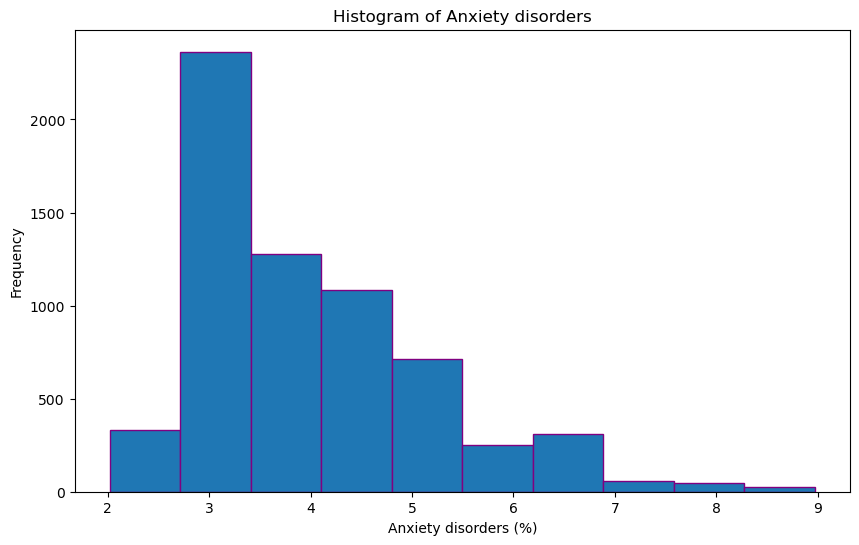

In [7]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Anxiety disorders (%)'] = pd.to_numeric(data['Anxiety disorders (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Anxiety disorders (%)'], bins=10, edgecolor='purple')

# Add labels and title
plt.xlabel('Anxiety disorders (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Anxiety disorders')

# Show the plot
plt.show()

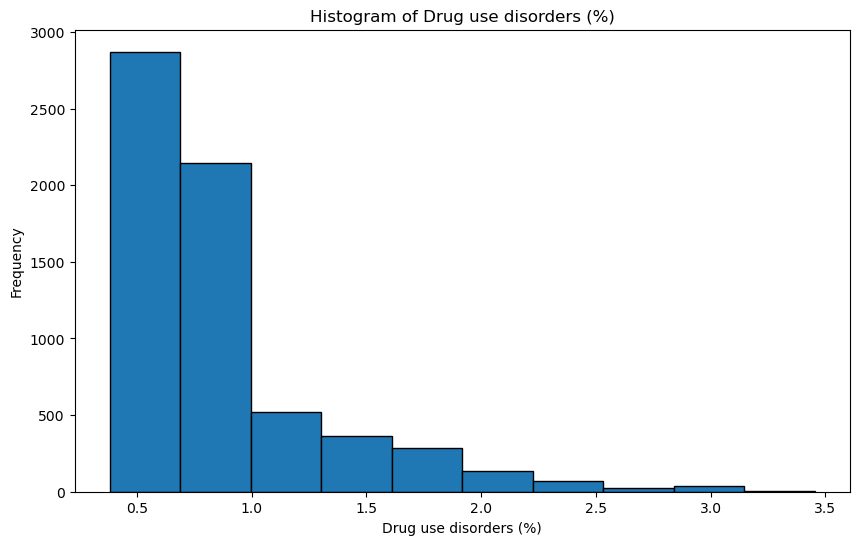

In [8]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Drug use disorders (%)'] = pd.to_numeric(data['Drug use disorders (%)'], errors='coerce')

# Create the histogram using the 'Bipolar disorder (%)' column data
plt.figure(figsize=(10, 6))
plt.hist(data['Drug use disorders (%)'], bins=10, edgecolor='black')

# Add labels and title
plt.xlabel('Drug use disorders (%)')
plt.ylabel('Frequency')
plt.title('Histogram of Drug use disorders (%)')

# Show the plot
plt.show()

In [9]:
#Check unique data in Bipolar disorder columns
print(data['Bipolar disorder (%)'].unique())
print('')
print('-'*75)
print('')

#Check number of unique data IN Depression too.
print(data['Depression (%)'].unique())
print('')
print('-'*75)
print('')

#Check number of unique data IN Drug Use too.
print(data['Drug use disorders (%)'].unique())
print('')
print('-'*75)
print('')

#Check number of unique data IN Anxiety too.
print(data['Anxiety disorders (%)'].unique())
print('')
print('-'*75)
print('')
print('number of unique Bipolar disorder (%) cases in our dataset is :', data['Bipolar disorder (%)'].nunique())
print('number of unique Despression (%) cases in our dataset is :', data['Depression (%)'].nunique())
print('number of unique Drug use disorders (%) cases in our dataset is :', data['Drug use disorders (%)'].nunique())
print('number of unique Anxiety disorders (%) cases in our dataset is :', data['Anxiety disorders (%)'].nunique())

[0.69777938 0.69796059 0.69810697 ... 0.60936267 0.61023423 0.61124239]

---------------------------------------------------------------------------

[4.07183118 4.07953094 4.08835824 ... 3.15570999 3.17413371 3.19278912]

---------------------------------------------------------------------------

[1.67708194 1.68474573 1.69433394 ... 0.77180178 0.77227457 0.77264827]

---------------------------------------------------------------------------

[4.8288297  4.82974037 4.83110837 ... 3.0986867  3.10429409 3.1109256 ]

---------------------------------------------------------------------------

number of unique Bipolar disorder (%) cases in our dataset is : 6468
number of unique Despression (%) cases in our dataset is : 6468
number of unique Drug use disorders (%) cases in our dataset is : 6468
number of unique Anxiety disorders (%) cases in our dataset is : 6468


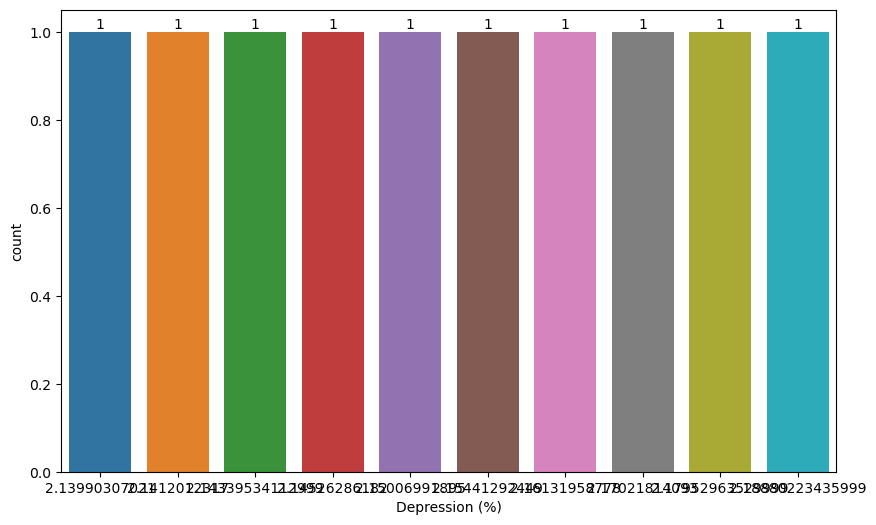

In [10]:
#Plot Depression columns after cleaning and new categorizing
data = pd.DataFrame(data)

# Convert the 'Depression (%)' column to numeric
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Depression (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Depression (%)'].isin(distinct_data)], x='Depression (%)')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


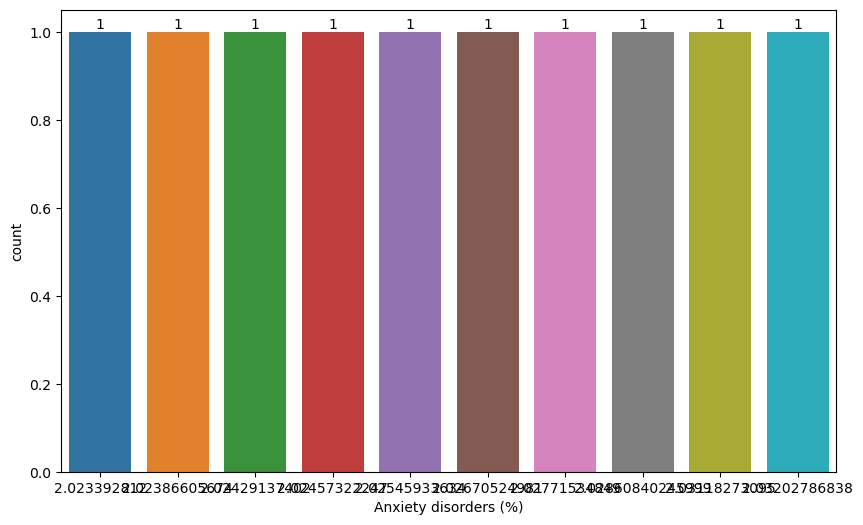

In [11]:
#Plot Anxiety disorders columns after cleaning and new categorizing
data = pd.DataFrame(data)

# Convert the 'Anxiety disorders (%)' column to numeric
data['Anxiety disorders (%)'] = pd.to_numeric(data['Anxiety disorders (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Anxiety disorders (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Anxiety disorders (%)'].isin(distinct_data)], x='Anxiety disorders (%)')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()

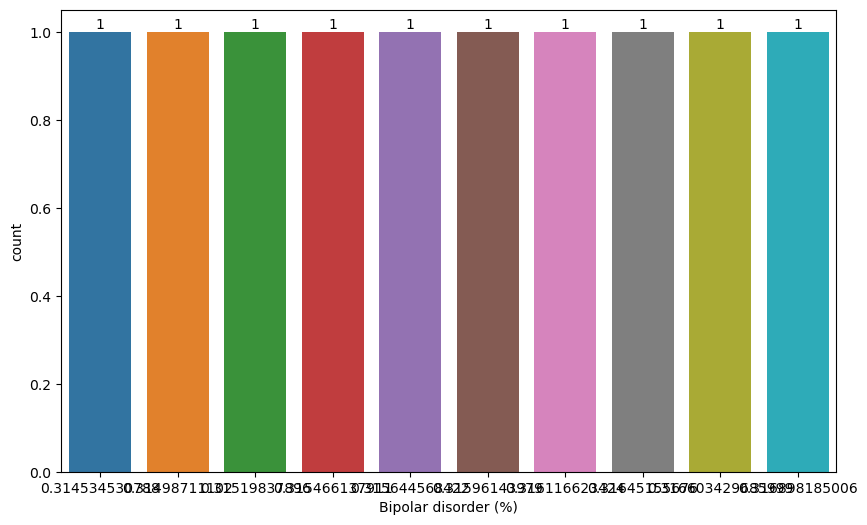

In [12]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Bipolar disorder (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
bx = sns.countplot(data=data[data['Bipolar disorder (%)'].isin(distinct_data)], x='Bipolar disorder (%)')
bx.bar_label(bx.containers[0])

# Show the plot
plt.show()

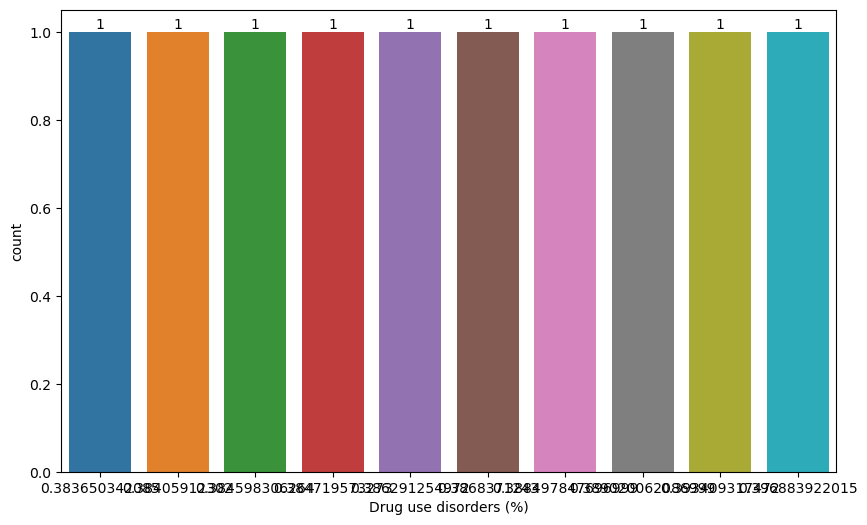

In [13]:
 #Plot Drug use disorders columns after cleaning and new categorizing
data = pd.DataFrame(data)

# Convert the 'Drug use disorders (%)' column to numeric
data['Drug use disorders (%)'] = pd.to_numeric(data['Drug use disorders (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Drug use disorders (%)'].sort_values().drop_duplicates().head(10)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data[data['Drug use disorders (%)'].isin(distinct_data)], x='Drug use disorders (%)')
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()

In [14]:
#Our data is clean now ? let's see.
if data.isnull().sum().sum() == 0:
    print('There is no missing data')
else:
    print('There is {} missing data'.format(data.isnull().sum().sum()))

There is no missing data


In [15]:
#Let's check duplicated data.
if data.duplicated().sum() == 0:
    print('There is no duplicated data:')
else:
    print('There is {} duplicated data:'.format(data.duplicated().sum()))
    #If there is duplicated data drop it.
    data.drop_duplicates(inplace=True)

print('-'*50)
print(data.duplicated().sum())

There is no duplicated data:
--------------------------------------------------
0


In [16]:
#Look unique data in Age column
data['Bipolar disorder (%)'].unique()

array([0.69777938, 0.69796059, 0.69810697, ..., 0.60936267, 0.61023423,
       0.61124239])

In [17]:
#We had a lot of nonsense answers in the Bipolar disorder column too
#This filtering will drop entries exceeding 100 years and those indicating negative values.
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Filter the DataFrame to drop entries exceeding 100 and those indicating negative values
data = data.drop(data[data['Bipolar disorder (%)'] < 0].index)
data = data.drop(data[data['Bipolar disorder (%)'] > 100].index)


print(data['Bipolar disorder (%)'].unique())

[0.69777938 0.69796059 0.69810697 ... 0.60936267 0.61023423 0.61124239]


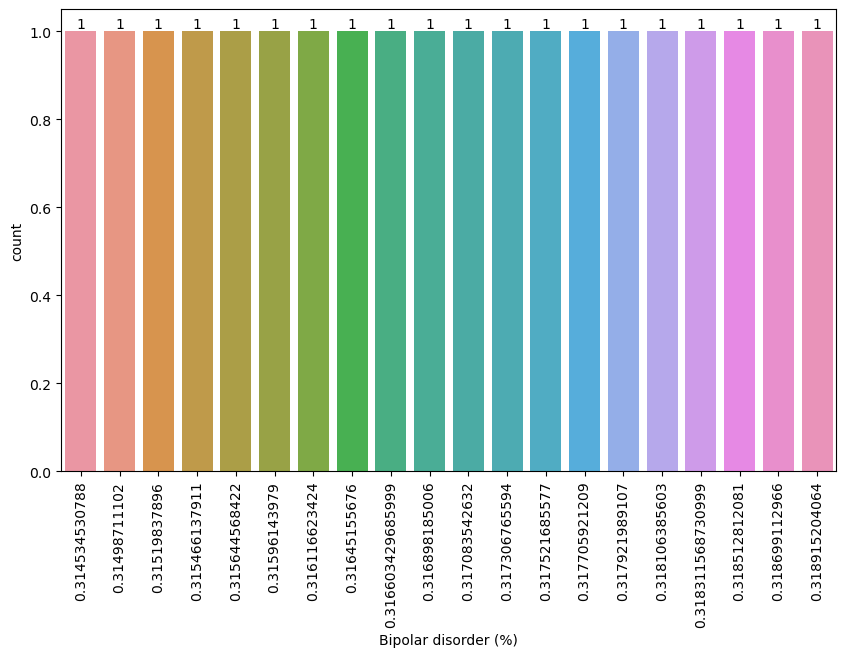

In [18]:
#Let's see the Bipolar disorder distribution in this dataset.
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Bipolar disorder (%)'].sort_values().drop_duplicates().head(20)

# Create the countplot using the distinct data
plt.figure(figsize=(10, 6))
age_range_plot = sns.countplot(data=data[data['Bipolar disorder (%)'].isin(distinct_data)], x='Bipolar disorder (%)')
age_range_plot.bar_label(age_range_plot.containers[0])
plt.xticks(rotation=90)

# Show the plot
plt.show()

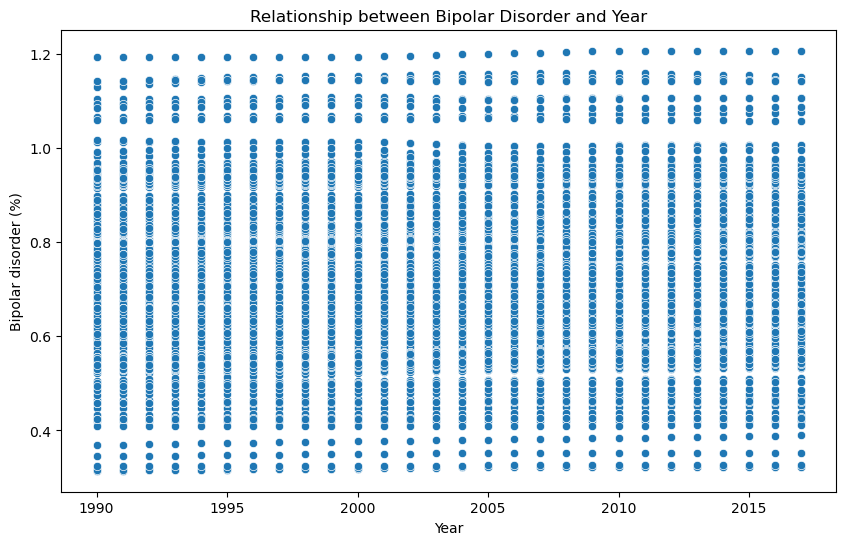

In [19]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')

# Create a scatter plot to visualize the relationship between 'Year' and 'Bipolar disorder (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Year', y='Bipolar disorder (%)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Bipolar disorder (%)')
plt.title('Relationship between Bipolar Disorder and Year')

# Show the plot
plt.show()

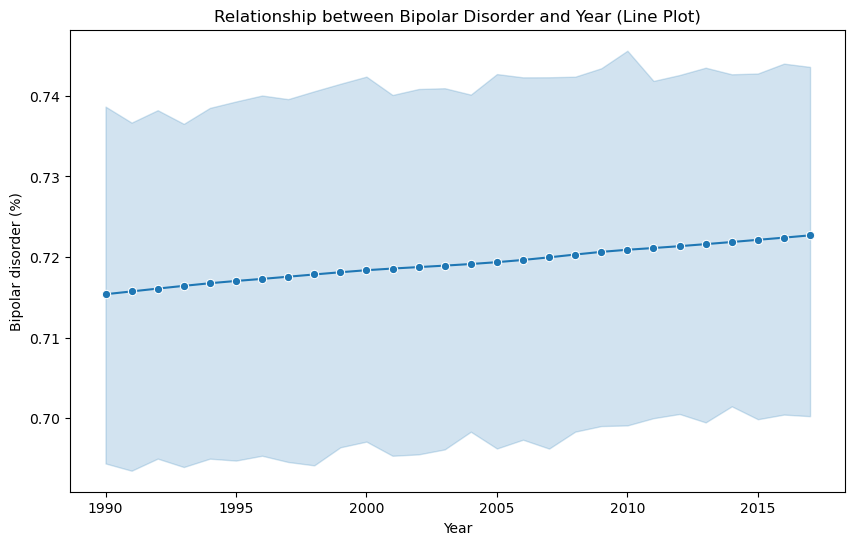

In [20]:
# Create a line plot to visualize the relationship between 'Year' and 'Bipolar disorder (%)'
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Bipolar disorder (%)', marker='o')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Bipolar disorder (%)')
plt.title('Relationship between Bipolar Disorder and Year (Line Plot)')

# Show the plot
plt.show()

C:\Users\user\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

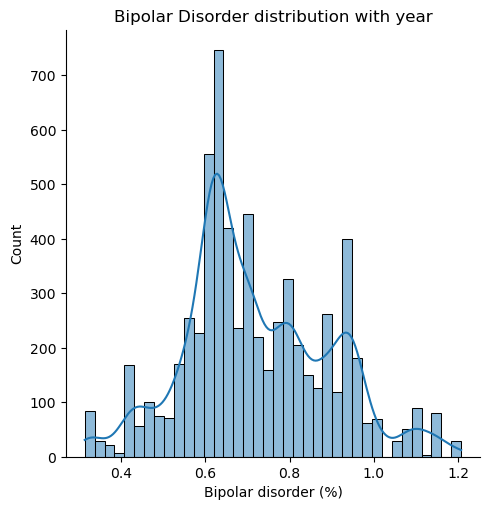

In [21]:
plt.figure(figsize=(10, 6));
sns.displot(data['Bipolar disorder (%)'], kde = 'Year');
plt.title('Bipolar Disorder distribution with year');

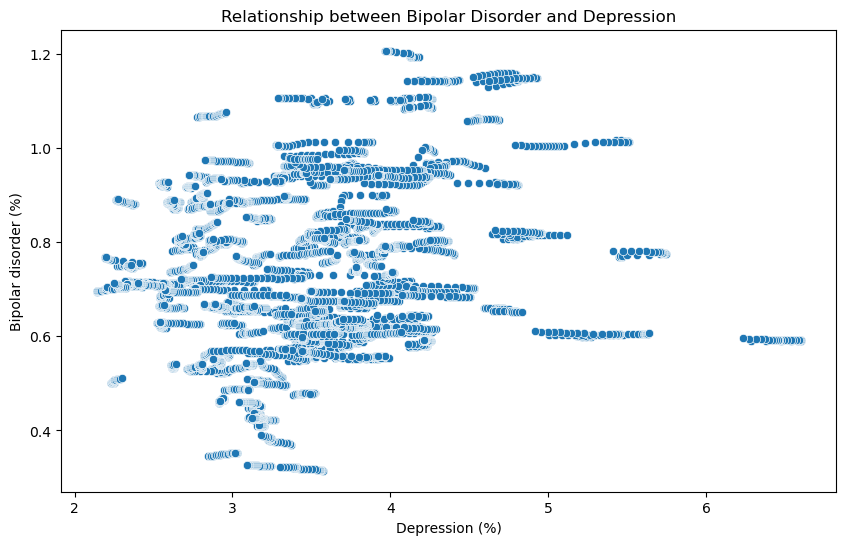

In [22]:
data = pd.DataFrame(data)

# Convert the 'Bipolar disorder (%)' column to numeric
data['Bipolar disorder (%)'] = pd.to_numeric(data['Bipolar disorder (%)'], errors='coerce')
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Create a scatter plot to visualize the relationship between 'Depression' and 'Bipolar disorder (%)'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Depression (%)', y='Bipolar disorder (%)')

# Add labels and title
plt.xlabel('Depression (%)')
plt.ylabel('Bipolar disorder (%)')
plt.title('Relationship between Bipolar Disorder and Depression')

# Show the plot
plt.show()

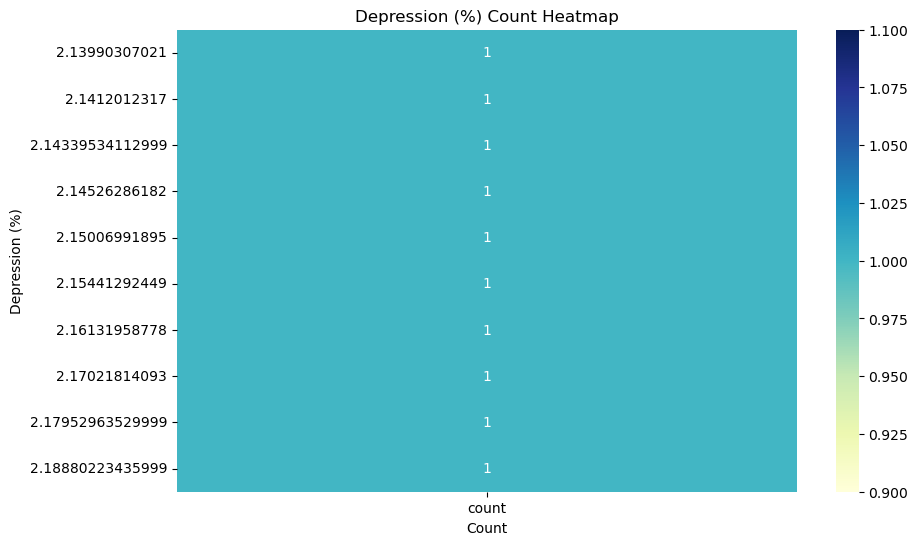

In [23]:
data = pd.DataFrame(data)
# Convert the 'Depression (%)' column to numeric
data['Depression (%)'] = pd.to_numeric(data['Depression (%)'], errors='coerce')

# Sort and select 10 distinct values from the column
distinct_data = data['Depression (%)'].sort_values().drop_duplicates().head(10)

# Filter the DataFrame to include only the top 10 distinct values
filtered_df = data[data['Depression (%)'].isin(distinct_data)]

# Create a crosstab to convert the column to 2-dimensional format
heatmap_data = pd.crosstab(index=filtered_df['Depression (%)'], columns='count')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

# Show the plot
plt.title('Depression (%) Count Heatmap')
plt.xlabel('Count')
plt.ylabel('Depression (%)')
plt.show()

In [24]:
#Check Dtypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       6468 non-null   int64  
 1   Bipolar disorder (%)       6468 non-null   float64
 2   Anxiety disorders (%)      6468 non-null   float64
 3   Drug use disorders (%)     6468 non-null   float64
 4   Depression (%)             6468 non-null   float64
 5   Alcohol use disorders (%)  6468 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 303.3 KB


In [25]:
#Let's check Standard deviation
data.describe()

,Year,Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,2003.500000,0.719145,3.989921,0.862278,3.497654,1.585821
std,8.078372,0.171589,1.167526,0.460679,0.655859,0.860283
min,1990.000000,0.314535,2.023393,0.383650,2.139903,0.446940
25%,1996.750000,0.615532,3.188824,0.535064,3.005529,0.993685
50%,2003.500000,0.693134,3.554373,0.726430,3.499606,1.479937
75%,2010.250000,0.835063,4.682163,0.940157,3.912381,1.867834
max,2017.000000,1.206597,8.967330,3.452476,6.602754,5.474668


In [26]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

data['Year'] = MaxAbsScaler().fit_transform(data[['Year']])
data['Bipolar disorder (%)'] = StandardScaler().fit_transform(data[['Bipolar disorder (%)']])
data['Anxiety disorders (%)'] = StandardScaler().fit_transform(data[['Anxiety disorders (%)']])
data['Drug use disorders (%)'] = StandardScaler().fit_transform(data[['Drug use disorders (%)']])
data['Depression (%)'] = StandardScaler().fit_transform(data[['Depression (%)']])

data.describe()

,Year,Bipolar disorder (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000
mean,0.993307,-3.515363e-17,1.032638e-16,9.227828e-17,-4.701798e-16,1.585821
std,0.004005,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.860283
min,0.986614,-2.358210e+00,-1.684485e+00,-1.039042e+00,-2.070347e+00,0.446940
25%,0.989960,-6.038920e-01,-6.862021e-01,-7.103414e-01,-7.504098e-01,0.993685
50%,0.993307,-1.515994e-01,-3.730813e-01,-2.949095e-01,2.977106e-03,1.479937
75%,0.996653,6.756065e-01,5.929593e-01,1.690651e-01,6.323918e-01,1.867834
max,1.000000,2.841035e+00,4.263539e+00,5.623002e+00,4.734769e+00,5.474668


# Split the data to train and test

In [27]:
from sklearn.model_selection import train_test_split

#I wanna work on 'Bipolar Disorder' column.
X = data.drop(columns = ['Bipolar disorder (%)'])
y = data['Depression (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(X_train.shape, y_train.shape)
print('-'*30)
print(X_test.shape, y_test.shape)
print('_'*30)

(4851, 5) (4851,)
------------------------------
(1617, 5) (1617,)
______________________________


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DT

# Random Forest Classifier

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

bins = data['Bipolar disorder (%)']
labels = ['Low', 'Medium', 'High']


# Separate features (X) and target variable (y)
X = data.drop(columns=['Bipolar disorder (%)'])
threshold = 0.5
y_binary = (y > threshold).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       901
           1       1.00      1.00      1.00       393

    accuracy                           1.00      1294
   macro avg       1.00      1.00      1.00      1294
weighted avg       1.00      1.00      1.00      1294


Confusion Matrix:
[[901   0]
 [  0 393]]


# K nearest neighbor

In [30]:
steps_knn = [('Scaler', StandardScaler()),
             ('clf', KNN(n_neighbors = 5))]



clf_knn = Pipeline(steps=steps_knn)


clf_knn.fit(X_train, y_train)

y_pred_knn = clf_knn.predict(X_test)
print('KNN accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_knn)*100)

KNN accuracy : 98.68624420401855


# Support vector Classifier

In [31]:
steps_svc = [('Scaler', StandardScaler()),
             ('clf', SVC())]



clf_svc = Pipeline(steps=steps_svc)


clf_svc.fit(X_train, y_train)

y_pred_svc = clf_svc.predict(X_test)
print('SVC accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_svc)*100)

SVC accuracy : 98.76352395672335


# Decision Tree

In [32]:
steps_dt = [('Scaler', StandardScaler()),
             ('clf', DT())]



clf_dt = Pipeline(steps=steps_dt)


clf_dt.fit(X_train, y_train)

y_pred_dt = clf_dt.predict(X_test)
print('DT accuracy :', accuracy_score(y_true=y_test, y_pred=y_pred_dt)*100)

DT accuracy : 100.0


**LSTM Data Testing**

In [33]:

# Split the data into input features and target variable
X = data.iloc[:, :-1].values  # Input features
y = data.iloc[:, -1].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()


# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training set
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test set
X_test_encoded = encoder.transform(X_test)

# Check the data type of your input arrays

X_train = X_train.astype('float32')
y_train = y_train.astype('int32')

# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))  # Change the activation function based on your problem

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Change the loss function based on your problem

# Train the model
y_test = y_test.astype('int32')

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))



Epoch 1/10


162/162 [==============================] - 21s 8ms/step - loss: -0.3905 - accuracy: 0.5280
Epoch 2/10
162/162 [==============================] - 1s 8ms/step - loss: -1.0059 - accuracy: 0.5278
Epoch 3/10
162/162 [==============================] - 1s 8ms/step - loss: -2.1553 - accuracy: 0.4675
Epoch 4/10
162/162 [==============================] - 1s 9ms/step - loss: -3.0836 - accuracy: 0.4673
Epoch 5/10
162/162 [==============================] - 1s 8ms/step - loss: -4.0595 - accuracy: 0.4768
Epoch 6/10
162/162 [==============================] - 1s 7ms/step - loss: -4.9217 - accuracy: 0.5290
Epoch 7/10
162/162 [==============================] - 1s 8ms/step - loss: -5.6531 - accuracy: 0.5307
Epoch 8/10
162/162 [==============================] - 1s 8ms/step - loss: -6.8316 - accuracy: 0.5396
Epoch 9/10
162/162 [==============================] - 1s 8ms/step - loss: -7.7270 - accuracy: 0.5325
Epoch 10/10
41/41 [==============================] - 1s 4ms/step - loss: -5.3526 - acc

## LSTM **PREDICTION**

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
# Extract the features and target variable
X = data.drop('Bipolar disorder (%)', axis=1).values  # Input features
y = data['Bipolar disorder (%)'].values  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()


# Create an instance of the OneHotEncoder with 'ignore' for handle_unknown
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the training set
X_train_encoded = encoder.fit_transform(X_train)

# Transform the test set
X_test_encoded = encoder.transform(X_test)

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
y_train = y_train.reshape(y_train.shape[0], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Check for missing values (represented by a specific value, e.g., -1) in y_test
print(y_test.dtype)
print(np.unique(y_test))

# Train the model
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model

loss = model.evaluate(X_test, y_test)
print('Loss:', loss)

# Make predictions
predictions = model.predict(X_test)



float64
[-2.35557208 -2.34989336 -2.33739188 ...  2.76963229  2.81101828
  2.83806975]
Epoch 1/10
162/162 [==============================] - 6s 9ms/step - loss: 0.8126
Epoch 2/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6778
Epoch 3/10
162/162 [==============================] - 1s 7ms/step - loss: 0.6719
Epoch 4/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6731
Epoch 5/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6626
Epoch 6/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6526
Epoch 7/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6414
Epoch 8/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6414
Epoch 9/10
162/162 [==============================] - 1s 8ms/step - loss: 0.6358
Epoch 10/10
41/41 [==============================] - 1s 4ms/step - loss: 0.6160
Loss: 0.616036593914032
41/41 [==============================] - 1s 4ms/step


In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib



if X_train.ndim == 3:
    n_samples, n_timesteps, n_features = X_train.shape
    X_train_reshaped = X_train.reshape(n_samples, n_timesteps * n_features)
else:
    X_train_reshaped = X_train

scaler = StandardScaler()
scaler.fit(X_train_reshaped)

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [37]:
model.save('disorder_model.h5')

C:\Users\user\anaconda4\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [38]:
from tensorflow.keras.models import load_model
loaded_model = load_model('disorder_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
